<h4>Кластеризация -- это задача машинного обучения без учителя, где мы группируем похожие объекты вместе.</h4>
<p>Пример из жизни:</p>
<ol>
    <li>Группировать по поведению</li>
    <li>Сегментация рынка</li>
    <li>Обнаружение аномалий</li>
    <li>Классификация документов</li>
</ol>

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans, DBSCAN, Birch
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

In [2]:
path = r"A:\\Programs\\M VS Code projects\\jupyter\\IPYNB-machine-learning\\lects\\student-scores.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,No,Yes
0,0,1,340.0,116.0,1518.0,1.0,-0.433184,3,0.0,27,1,73,81,93,97,63,80,87,1.0,0.0
1,1,2,114.0,569.0,477.0,0.0,-0.433184,2,0.0,47,0,90,86,96,100,90,88,90,1.0,0.0
2,2,3,423.0,12.0,1888.0,0.0,-0.433184,9,1.0,13,0,81,97,95,96,65,77,94,0.0,1.0
3,3,4,412.0,129.0,1829.0,0.0,-0.433184,5,0.0,3,0,71,74,88,80,89,63,86,1.0,0.0
4,4,5,34.0,104.0,143.0,1.0,-0.433184,5,0.0,10,1,84,77,65,65,80,74,76,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,5.0,534.0,18.0,1.0,-0.433184,2,0.0,30,1,83,77,84,73,75,84,82,1.0,0.0
1996,1996,1997,419.0,240.0,1856.0,1.0,-0.433184,2,0.0,20,1,89,65,73,80,87,67,73,1.0,0.0
1997,1997,1998,287.0,157.0,1232.0,0.0,-0.433184,5,0.0,14,0,97,85,63,93,68,94,78,1.0,0.0
1998,1998,1999,65.0,142.0,265.0,0.0,2.308487,10,1.0,5,0,51,96,72,89,95,88,75,0.0,1.0


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2000 non-null   int64  
 1   id                          2000 non-null   int64  
 2   first_name                  2000 non-null   float64
 3   last_name                   2000 non-null   float64
 4   email                       2000 non-null   float64
 5   gender                      2000 non-null   float64
 6   part_time_job               2000 non-null   float64
 7   absence_days                2000 non-null   int64  
 8   extracurricular_activities  2000 non-null   float64
 9   weekly_self_study_hours     2000 non-null   int64  
 10  career_aspiration           2000 non-null   int64  
 11  math_score                  2000 non-null   int64  
 12  history_score               2000 non-null   int64  
 13  physics_score               2000 non-null   

In [4]:
mini_df = df[['part_time_job', 'absence_days', 'weekly_self_study_hours']].iloc[::2]
mini_df

,part_time_job,absence_days,weekly_self_study_hours
0,-0.433184,3,27
2,-0.433184,9,13
4,-0.433184,5,10
6,-0.433184,3,23
8,-0.433184,6,25
...,...,...,...
1990,-0.433184,0,17
1992,-0.433184,2,12
1994,-0.433184,1,19
1996,-0.433184,2,20


<p>DBSCAN - это алгоритм кластеризации, основанный на концепции алотности точек данных в пространстве. Берёт точки, окружённые областями высокой плотности, и объединяет в один кластер.</p>

In [10]:
dbscan = DBSCAN(eps=8)
mini_df_clus = mini_df.copy(deep=True) # копирует значение, а не делает экземпляр класса
mini_df_clus['dbscan'] = dbscan.fit(mini_df).labels_
mini_df_clus

,part_time_job,absence_days,weekly_self_study_hours,dbscan
0,-0.433184,3,27,0
2,-0.433184,9,13,0
4,-0.433184,5,10,0
6,-0.433184,3,23,0
8,-0.433184,6,25,0
...,...,...,...,...
1990,-0.433184,0,17,0
1992,-0.433184,2,12,0
1994,-0.433184,1,19,0
1996,-0.433184,2,20,0


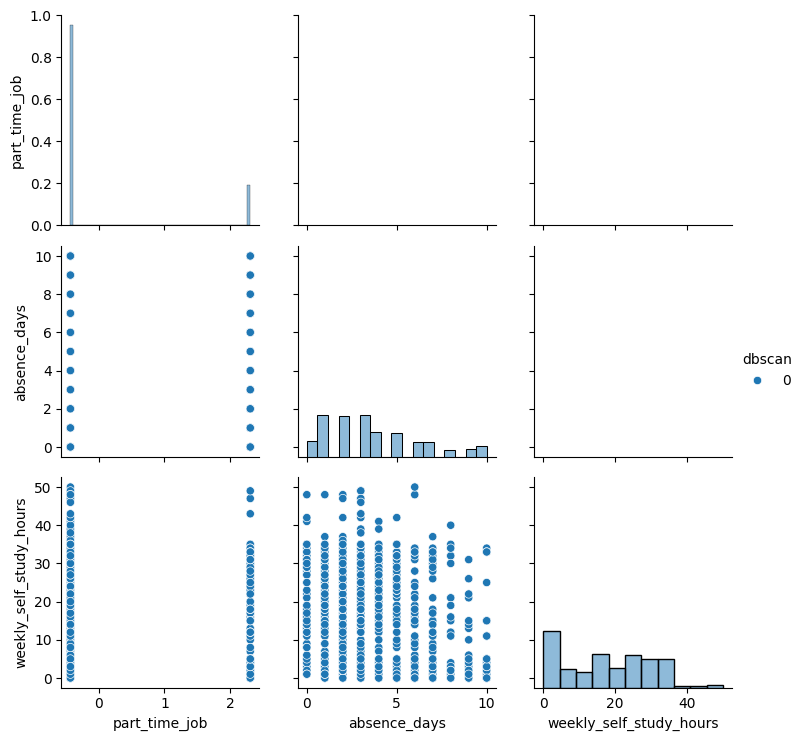

In [11]:
g = sns.PairGrid(mini_df_clus[['part_time_job', 'absence_days', 'weekly_self_study_hours', 'dbscan']], hue='dbscan')
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot)
g.add_legend()